# 1. Load the packages and the data

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier



nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jsjaramillo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
df = pd.read_csv('/Users/jsjaramillo/Desktop/NLP_Challenge/IMDB Dataset.csv')


# 2. Let's Explore the data set 
An example of the information that we have in our data set, this can help us to determine if the data set is balanced and if needed extra preproessing.

In [61]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [120]:
# Check for missing values, duplicates, and class balance
print("NULL:", df.isnull().sum(), '\n')
print("Duplicates:", df.duplicated().sum(), '\n')
print("Distribution:",df['sentiment'].value_counts())


NULL: review          0
sentiment       0
clean_review    0
dtype: int64 

Duplicates: 418 

Distribution: sentiment
1    25000
0    25000
Name: count, dtype: int64


We observe that the text in the review column of our data frame might contain HTML tags. Also, there are around 418 duplicates. The data set is perfectly balanced between positive and negative reviews.

# 3. Preprocessing



In [65]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # remove HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove punctuation
    text = text.lower().split()  # tokenize and lowercase
    text = [w for w in text if not w in stop_words]  # remove stopwords
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_text)


/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_87738/4279740953.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # remove HTML


Convert the sentiment values to boolean, 1 if the sentiment is positive, and 0 if the sentiment is negative.

In [66]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


/var/folders/gd/xlvgsvz1725fp8xqfp59nr9r0000gn/T/ipykernel_87738/3229850219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


# 4. Train-test split

In [69]:

X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)


In [48]:
print('train size:', df_train.shape)
print('test size:', df_test.shape)


train size: (40000, 2)
test size: (10000, 2)


In [89]:

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# 5. Models
## 5.1 Logistic Regression

In [91]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.892
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## 5.2 Random Forest

In [87]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)
y_pred = rf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8537
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



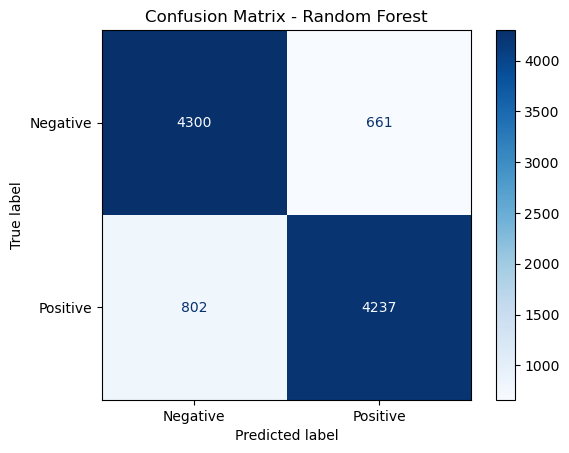

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with your trained model
y_pred = rf.predict(X_test_vec)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot it
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


## 5.3 KNN

In [128]:
# Initialize model
knn_model = KNeighborsClassifier()

# Fit model
knn_model.fit(X_train_vec, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test_vec)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      4961
           1       0.72      0.81      0.76      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



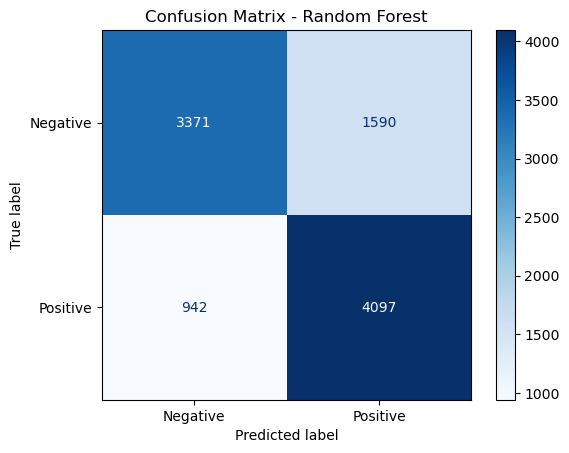

In [130]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot it
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

# 6. Results

Based on varying metrics like accuracy, recall, precision, and by looking at the confusion matrices, we can determine that logistic regression and random forests were the two best performing models.

# 7. On new reviews?

In [113]:
new_review = "This movie was boring, I love it so much!"


# Clean and transform the new review
cleaned_review = clean_text(new_review)
review_vec = vectorizer.transform([cleaned_review])

# Predict with your model
prediction = rf.predict(review_vec)[0]  # or log_reg.predict(...)

# Interpret the result
sentiment = "Positive" if prediction == 1 else "Negative"
print("Predicted Sentiment:", sentiment)


Predicted Sentiment: Negative


In [116]:
nums=[1,2,3,4,5,6,7,8,9]
x=[i+5 for i in nums if i%2]
print(x)

[6, 8, 10, 12, 14]
